#  humidity and wind speed in Dublin analysis

In [1]:
import urllib.request
import json
import pandas as pd
import time
import csv
from datetime import datetime, timedelta
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Task 1: Identify one or more suitable web APIs

darksky: https://api.darksky.net/forecast/[key]/[latitude],[longitude],[time]
https://api.darksky.net/forecast/ab7bca6d83bb937f0a2f4864baea2669/53.3498,-6.2603,1551052800?exclude=currently,flags
apiKey:

In [2]:
api_key = ""

### Task 2: Collect data your chosen API(s)

In [3]:
#create a file with set headings
def create_file (file_loc, headings): 
    with open(file_loc, "w",newline='') as write_file:
        f = csv.writer(write_file)
        f.writerow(headings)
        write_file.close()
        
def get_data(file_name, api_key, lat, lon, stamp_time):
    try:
        link = "https://api.darksky.net/forecast/" + api_key + '/' + lat + ',' + lon + ',' + str(stamp_time) + '?exclude=currently,flags'
        response = urllib.request.urlopen(link)
        jsonData = response.read().decode("utf-8")
        data = json.loads(jsonData)
        df = pd.DataFrame(data['hourly']['data'])
        #based on the api, some data has no precipType
        if('precipType' not in df.columns.values.tolist()):
            df['precipType'] = ''
        # I found that the order of the data is not uniform, so I set the order of heading 
        df = df[['time','precipIntensity','precipProbability','temperature','apparentTemperature',
            'dewPoint','humidity','pressure','windSpeed','windGust','windBearing','cloudCover','uvIndex',
            'visibility','ozone','precipType']]
        
        df.to_csv(file_name, mode='a',index=False, header=False)
    except:
        print("Failed to retrieve %s" % link)

### Task 3: Parse the collected data, and store it in an appropriate file format

In [4]:
#dublin latitude longitude
lat = '53.3498'
lon = '-6.2603'
file_name = "weather.csv"
headings = ['time','precipIntensity','precipProbability','temperature','apparentTemperature',
            'dewPoint','humidity','pressure','windSpeed','windGust','windBearing','cloudCover','uvIndex',
            'visibility','ozone','precipType']
create_file(file_name,headings)
start_time = datetime.strptime('2019-01-01 00:00:00', "%Y-%m-%d %H:%M:%S")
end_time = datetime.strptime('2019-12-31 00:00:00', "%Y-%m-%d %H:%M:%S")
time_list = []
while start_time <= end_time:
    date_str = start_time.strftime("%Y-%m-%d %H:%M:%S")
    ts = time.strptime(date_str, "%Y-%m-%d %H:%M:%S")
    stamp_time = int(time.mktime(ts))
    get_data(file_name, api_key, lat, lon, stamp_time)
    time_list.append(stamp_time)
    start_time += timedelta(days=1)
    
print("Data Collection Completed")

Data Collection Completed


### Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data

In [5]:
file_name = "weather.csv"
df = pd.read_csv(file_name)

In [6]:
df

,time,precipIntensity,precipProbability,temperature,apparentTemperature,dewPoint,humidity,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType
0,1546300800,0.0000,0.00,47.54,42.07,40.47,0.76,1035.3,12.85,25.07,265,0.51,0,10.0,273.7,NaN
1,1546304400,0.0000,0.00,46.97,41.41,40.56,0.78,1035.0,12.65,24.81,186,0.50,0,10.0,274.8,NaN
2,1546308000,0.0002,0.02,46.30,40.68,40.78,0.81,1034.5,12.26,24.30,345,0.50,0,10.0,276.3,rain
3,1546311600,0.0003,0.02,46.22,40.88,41.09,0.82,1035.0,11.34,23.43,272,0.52,0,10.0,277.6,rain
4,1546315200,0.0002,0.02,45.80,40.39,40.98,0.83,1035.3,11.23,22.10,259,0.51,0,10.0,278.5,rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1577818800,0.0000,0.00,46.49,43.05,38.50,0.74,1030.4,6.82,9.39,142,0.69,0,10.0,280.5,NaN
8756,1577822400,0.0000,0.00,46.33,42.67,38.40,0.74,1030.1,7.21,10.20,142,0.75,0,10.0,279.6,NaN
8757,1577826000,0.0000,0.00,46.20,42.42,38.69,0.75,1030.2,7.40,10.47,145,0.78,0,10.0,278.8,NaN
8758,1577829600,0.0000,0.00,45.86,42.18,38.70,0.76,1030.4,7.04,9.71,159,0.78,0,10.0,277.6,NaN


In [7]:
df.dtypes.value_counts()

float64    12
int64       3
object      1
dtype: int64

In [8]:
df.shape

(8760, 16)

In [9]:
#from 2019-01-01 to 2019-12-31 should have 1*24*365 = 8760 data but I am not sure about the data quality so I try to remove duplicate data
#there is no repeat data in the dataset
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [10]:
# Check for presence of missing values, the column precipType has nearly half values missing
# It's not important feature so I determine to remove it
print("Missing Values")
print(df.isnull().sum())

Missing Values
time                      0
precipIntensity           0
precipProbability         0
temperature               0
apparentTemperature       0
dewPoint                  0
humidity                  0
pressure                  0
windSpeed                 0
windGust                  0
windBearing               0
cloudCover                0
uvIndex                   0
visibility                0
ozone                     0
precipType             3134
dtype: int64


In [11]:
# extract temperature,humidity and windSpeed data for analysis and visualisa
# I am more interest in temperature,humidity and windSpeed so I keep those column
dataset = df[['time','temperature','humidity','windSpeed']]
dataset = pd.DataFrame(dataset)

In [12]:
# no missing data 
print("Missing Values")
print(dataset.isnull().sum())

Missing Values
time           0
temperature    0
humidity       0
windSpeed      0
dtype: int64


In [13]:
dataset.describe()

,time,temperature,humidity,windSpeed
count,8.760000e+03,8760.000000,8760.000000,8760.000000
mean,1.562067e+09,51.943872,0.813079,11.671339
std,9.104179e+06,8.100560,0.094206,5.798096
min,1.546301e+09,31.410000,0.400000,1.460000
25%,1.554184e+09,45.960000,0.750000,7.130000
50%,1.562067e+09,51.110000,0.820000,10.850000
75%,1.569950e+09,57.970000,0.880000,15.422500
max,1.577833e+09,78.150000,1.000000,35.520000


#### detect outliers

In [14]:
# 1.5 IQR rule
def detect_outliers(sr):
    q1 = sr.quantile(0.25)
    q3 = sr.quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = sr.loc[(sr < fence_low) | (sr > fence_high)]
    return outliers

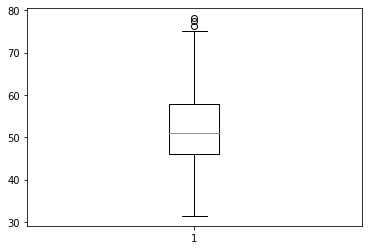

In [15]:
plt.figure()
p = plt.boxplot(dataset['temperature'])
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()
plt.show()

In [16]:
#temperature outliers
outliers = detect_outliers(dataset['temperature'])
outliers

4860    76.28
4861    77.54
4862    78.15
Name: temperature, dtype: float64

In [17]:
# from 1563793200 to 1563804000 the temperature become higher
# the data around the outlier data there is no big difference
# I think these data are reasonable
dataset[4859:4865]

,time,temperature,humidity,windSpeed
4859,1563793200,72.39,0.74,17.11
4860,1563796800,76.28,0.68,17.11
4861,1563800400,77.54,0.65,16.32
4862,1563804000,78.15,0.63,16.52
4863,1563807600,75.10,0.69,16.53
4864,1563811200,75.13,0.69,16.59


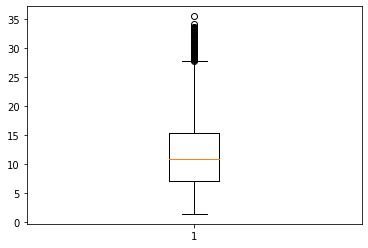

In [18]:
plt.figure()
p = plt.boxplot(dataset['windSpeed'])
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()
plt.show()

In [19]:
# there are 84 outliers data, think about that usually weather changeable
# looks like those data are no big difference so at this moment keep them 
outliers = detect_outliers(dataset['windSpeed'])
outliers

624     29.79
625     30.82
626     29.30
627     28.23
924     28.77
        ...  
8442    32.72
8443    33.68
8444    33.53
8445    32.49
8446    30.81
Name: windSpeed, Length: 85, dtype: float64

In [20]:
outliers.values

array([29.79, 30.82, 29.3 , 28.23, 28.77, 29.03, 28.45, 29.44, 32.45,
       33.42, 34.13, 35.52, 33.28, 33.36, 30.86, 27.97, 28.31, 28.77,
       28.3 , 29.44, 28.49, 28.59, 29.73, 28.99, 29.72, 30.51, 30.23,
       28.75, 30.52, 32.52, 32.64, 33.05, 33.73, 33.24, 33.43, 33.08,
       31.88, 31.8 , 31.88, 31.85, 31.42, 31.21, 31.54, 31.4 , 31.3 ,
       30.91, 28.71, 28.42, 28.07, 29.65, 28.49, 29.12, 28.67, 29.78,
       32.37, 32.77, 32.13, 30.67, 30.41, 30.51, 30.15, 29.95, 29.43,
       28.51, 30.19, 32.49, 32.68, 32.87, 30.38, 28.09, 28.11, 28.61,
       28.63, 28.45, 27.89, 28.6 , 29.18, 28.95, 28.93, 30.03, 32.72,
       33.68, 33.53, 32.49, 30.81])

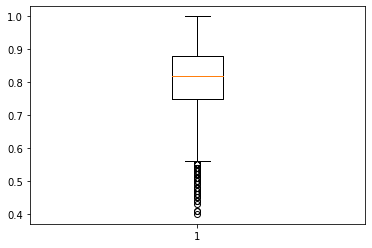

In [21]:
plt.figure()
p = plt.boxplot(df['humidity'])
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()
plt.show()

In [22]:
# same as the wind speed. To the humidity there are 206 outliers data, think about that usually weather changeable
# looks like those data are similar so at this moment keep them
outliers = detect_outliers(dataset['humidity'])
outliers

1645    0.55
1646    0.55
1957    0.54
1958    0.51
1959    0.55
        ... 
6156    0.50
6157    0.48
6158    0.47
6159    0.54
6590    0.54
Name: humidity, Length: 70, dtype: float64

In [23]:
outliers.values

array([0.55, 0.55, 0.54, 0.51, 0.55, 0.52, 0.49, 0.5 , 0.52, 0.55, 0.55,
       0.55, 0.54, 0.51, 0.51, 0.53, 0.52, 0.53, 0.55, 0.55, 0.51, 0.48,
       0.45, 0.44, 0.43, 0.46, 0.51, 0.55, 0.52, 0.52, 0.54, 0.55, 0.51,
       0.51, 0.49, 0.51, 0.54, 0.54, 0.52, 0.51, 0.45, 0.48, 0.54, 0.53,
       0.41, 0.4 , 0.41, 0.44, 0.45, 0.47, 0.46, 0.5 , 0.54, 0.48, 0.46,
       0.48, 0.52, 0.53, 0.53, 0.51, 0.54, 0.55, 0.55, 0.55, 0.54, 0.5 ,
       0.48, 0.47, 0.54, 0.54])

In [ ]:
#some value of temperature missing, because summary the data as daily still has the temperature missing data problem so use the monthly mean temperature to fill the missing data
#dataset["temperature"] = pd.to_numeric(dataset["temperature"], errors='coerce')

In [ ]:
#if the temperature has missing values I will use the month average temperature to fill it
'''
for i in range(0,12):
    if(i+1 == 1):
        begin = 0 
        end = 24*31
    elif(i+1 in (3,5,7,8,10,12)):
        end += 24*31
    elif(i+1 == 2):
        end += 24*28
    elif(i+1 in (4,6,9,11)):
        end += 24*30 
    dataset[begin:end]['temperature'] = dataset[begin:end]['temperature'].fillna(avg_monthly["temperature"][i])
    begin = end
'''

In [24]:
#transform the stamptime to time
dataset['time'] = pd.to_datetime(dataset['time'],unit='s')

In [25]:
dataset

,time,temperature,humidity,windSpeed
0,2019-01-01 00:00:00,47.54,0.76,12.85
1,2019-01-01 01:00:00,46.97,0.78,12.65
2,2019-01-01 02:00:00,46.30,0.81,12.26
3,2019-01-01 03:00:00,46.22,0.82,11.34
4,2019-01-01 04:00:00,45.80,0.83,11.23
...,...,...,...,...
8755,2019-12-31 19:00:00,46.49,0.74,6.82
8756,2019-12-31 20:00:00,46.33,0.74,7.21
8757,2019-12-31 21:00:00,46.20,0.75,7.40
8758,2019-12-31 22:00:00,45.86,0.76,7.04


In [26]:
# set time as index so that can use groupby
dataset.set_index("time")

,temperature,humidity,windSpeed
time,,,
2019-01-01 00:00:00,47.54,0.76,12.85
2019-01-01 01:00:00,46.97,0.78,12.65
2019-01-01 02:00:00,46.30,0.81,12.26
2019-01-01 03:00:00,46.22,0.82,11.34
2019-01-01 04:00:00,45.80,0.83,11.23
...,...,...,...
2019-12-31 19:00:00,46.49,0.74,6.82
2019-12-31 20:00:00,46.33,0.74,7.21
2019-12-31 21:00:00,46.20,0.75,7.40


In [27]:
daily = dataset.groupby(pd.Grouper(key='time', freq='24h'))
avg_daily = daily.mean()
avg_daily

,temperature,humidity,windSpeed
time,,,
2019-01-01,46.109583,0.805833,8.759167
2019-01-02,42.192083,0.755833,6.046667
2019-01-03,42.180417,0.788333,6.728333
2019-01-04,39.946250,0.717083,5.942083
2019-01-05,41.510417,0.745833,7.770000
...,...,...,...
2019-12-27,51.010417,0.847083,10.202917
2019-12-28,50.673333,0.751667,16.677500
2019-12-29,50.774167,0.741667,16.485833


In [28]:
monthly = dataset.groupby(pd.Grouper(key='time', freq='M'))
avg_monthly = monthly.mean()
avg_monthly

,temperature,humidity,windSpeed
time,,,
2019-01-31,43.439126,0.802567,11.673535
2019-02-28,47.227857,0.782202,14.710432
2019-03-31,47.307325,0.787285,13.992272
2019-04-30,49.437097,0.808542,11.510583
2019-05-31,53.551223,0.795739,8.521237
2019-06-30,56.793819,0.830736,9.930833
2019-07-31,62.511129,0.828118,8.621573
2019-08-31,61.814099,0.843481,11.485296
2019-09-30,57.865542,0.822056,11.056486


In [29]:
# monthly average data removed outliers
outliers = detect_outliers(avg_monthly['temperature'])
outliers

Series([], Freq: M, Name: temperature, dtype: float64)

In [30]:
outliers = detect_outliers(avg_monthly['windSpeed'])
outliers

Series([], Freq: M, Name: windSpeed, dtype: float64)

In [31]:
outliers = detect_outliers(avg_monthly['humidity'])
outliers

Series([], Freq: M, Name: humidity, dtype: float64)

### Task 5: Analyse and summarise the cleaned dataset

In [32]:
print("\nSimplified_data columnns:\n" + str(dataset.columns) + "\n")
print("Simplified_data Descriptive Stats:\n")
print(dataset.describe())


Simplified_data columnns:
Index(['time', 'temperature', 'humidity', 'windSpeed'], dtype='object')

Simplified_data Descriptive Stats:

       temperature     humidity    windSpeed
count  8760.000000  8760.000000  8760.000000
mean     51.943872     0.813079    11.671339
std       8.100560     0.094206     5.798096
min      31.410000     0.400000     1.460000
25%      45.960000     0.750000     7.130000
50%      51.110000     0.820000    10.850000
75%      57.970000     0.880000    15.422500
max      78.150000     1.000000    35.520000


In [33]:
print("Descriptive Stats:\n")
print(avg_monthly.describe())

Descriptive Stats:

       temperature   humidity  windSpeed
count    12.000000  12.000000  12.000000
mean     51.913926   0.812968  11.691045
std       6.526571   0.020510   2.007013
min      43.439126   0.782202   8.521237
25%      47.092709   0.799157  10.775073
50%      50.374261   0.810286  11.592059
75%      57.061750   0.828773  12.798682
max      62.511129   0.843481  14.710432


#### Visualization data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f91da50>,
      dtype=object)

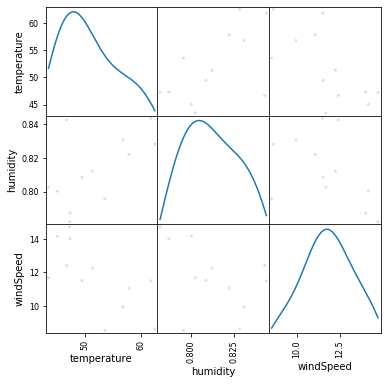

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(avg_monthly, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121ddaf50>,
      dtype=object)

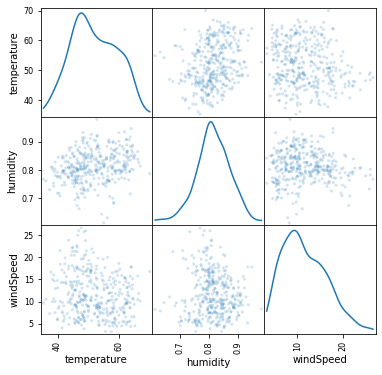

In [35]:
from pandas.plotting import scatter_matrix
scatter_matrix(avg_daily, alpha=0.2, figsize=(6, 6), diagonal='kde')

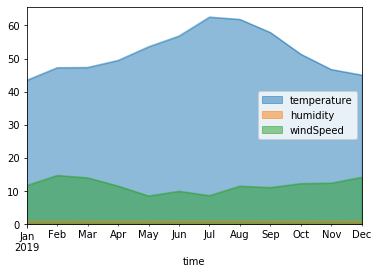

In [36]:
avg_monthly.plot.area(stacked=False)

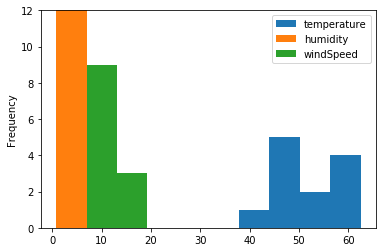

In [37]:
avg_monthly.plot.hist(stacked=True)

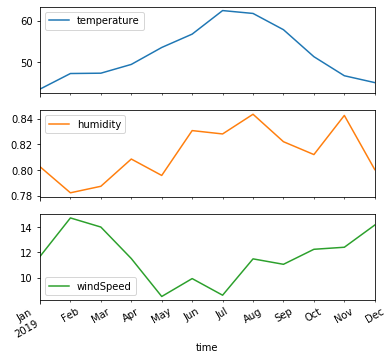

In [38]:
avg_monthly.plot(subplots=True, figsize=(6, 6));

The trend of wind speed, humidity looks more similar so I focus on analyzing the relationship between them

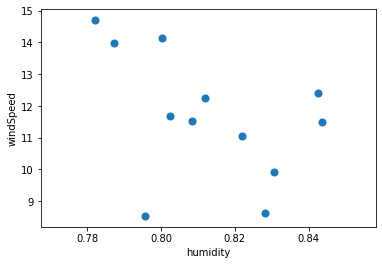

In [39]:
avg_monthly.plot.scatter(x="humidity", y="windSpeed", s=50 )

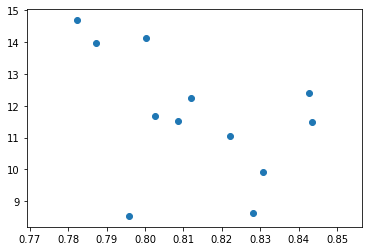

In [40]:
plt.scatter(avg_monthly['humidity'], avg_monthly['windSpeed'])
plt.show() 

<Figure size 432x288 with 0 Axes>

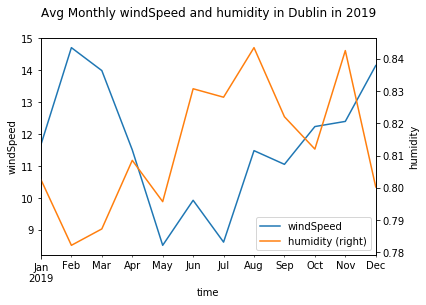

In [41]:
#because the unit of windSpeed and humidity has big different so set different scales on left and right on the same axes
plt.figure()

ax = avg_monthly[['windSpeed','humidity']].plot(secondary_y=['humidity'])
ax.set_ylabel("windSpeed")
ax.right_ax.set_ylabel("humidity")

plt.title("Avg Monthly windSpeed and humidity in Dublin in 2019\n")
plt.xlabel("Time")

plt.show()

In [42]:
avg_month_wind = avg_monthly[['windSpeed','humidity']].groupby("windSpeed") 
wind_data = avg_month_wind.mean()
wind_data

,humidity
windSpeed,
8.521237,0.795739
8.621573,0.828118
9.930833,0.830736
11.056486,0.822056
11.485296,0.843481
11.510583,0.808542
11.673535,0.802567
12.239422,0.812030
12.400819,0.842569


<Figure size 432x288 with 0 Axes>

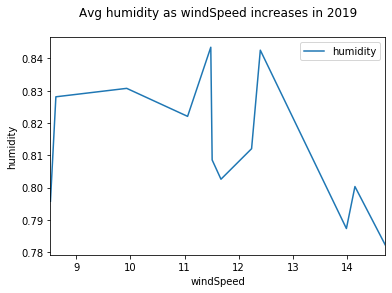

In [43]:
plt.figure()
avg_month_wind.mean().plot()
plt.title("Avg humidity as windSpeed increases in 2019\n")
plt.ylabel("humidity")
plt.xlabel("windSpeed")
plt.show()

In [44]:
avg_month_humidity = avg_monthly[['windSpeed','humidity']].groupby("humidity") 
humidity_data = avg_month_humidity.mean()
humidity_data

,windSpeed
humidity,
0.782202,14.710432
0.787285,13.992272
0.795739,8.521237
0.800296,14.150054
0.802567,11.673535
0.808542,11.510583
0.812030,12.239422
0.822056,11.056486
0.828118,8.621573


<Figure size 432x288 with 0 Axes>

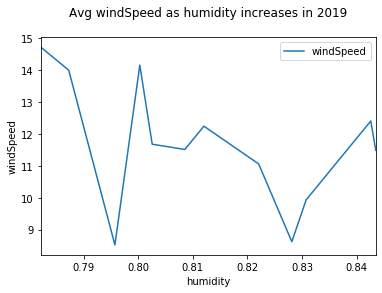

In [45]:
plt.figure()
avg_month_humidity.mean().plot()
plt.title("Avg windSpeed as humidity increases in 2019\n")
plt.ylabel("windSpeed")
plt.xlabel("humidity")
plt.show()

### Tentative Conclusion

Based on the data currently, May has the lowest wind speed and humidity in 2019 but when the wind speed increases the humidity looks not change regular and when the humidity increase, the wind speed looks not change regularly. That means there does not seem to be a strong relationship between the humidity and wind speed in Dublin. It may get into further studies.